<a href="https://colab.research.google.com/github/dharshdk/DL/blob/main/NN_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
x=np.array([[1,0,1,0],[1,0,1,1],[0,1,0,1]])

In [3]:
x

array([[1, 0, 1, 0],
       [1, 0, 1, 1],
       [0, 1, 0, 1]])

In [4]:
y=np.array([[1],[0],[1]])

In [10]:
y

array([[1],
       [0],
       [1]])

In [11]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [12]:
def derivative_sigmoid(x):
  return x*(1-x)

In [13]:
epoch=5000
lr=0.1
input_neurons=x.shape[1]
hidden_neurons=3
output_neurons=1

In [16]:
input_neurons

4

In [14]:
wh=np.random.uniform(size=(input_neurons,hidden_neurons))
bh=np.random.uniform(size=(1,hidden_neurons))
wo=np.random.uniform(size=(hidden_neurons,output_neurons))
bo=np.random.uniform(size=(1,output_neurons))

In [15]:
wh

array([[0.67809419, 0.22680685, 0.21996925],
       [0.29738617, 0.31081472, 0.13843189],
       [0.40456111, 0.29056317, 0.54045456],
       [0.22601004, 0.12146106, 0.09780139]])

In [17]:
for i in range(epoch):
  #forward
  hidden_input=np.dot(x,wh)
  hidden_input=hidden_input+bh
  hidden_activation=sigmoid(hidden_input)
  output_layer=np.dot(hidden_activation,wo)
  output=sigmoid(output_layer)
  #backward
  E=y-output
  slope_output=derivative_sigmoid(output)
  slope_hidden=derivative_sigmoid(hidden_activation)
  d_output=E*slope_output
  error_hidden=d_output.dot(wo.T)
  d_hidden=error_hidden*slope_hidden
  wo+=hidden_activation.T.dot(d_output)*lr
  bo+=np.sum(d_output,axis=0,keepdims=True)*lr
  wh+=x.T.dot(d_hidden)*lr
  bh+=np.sum(d_hidden,axis=0,keepdims=True)*lr

In [18]:

output

array([[0.95675475],
       [0.06806849],
       [0.97031198]])

Accuracy: 100.00%


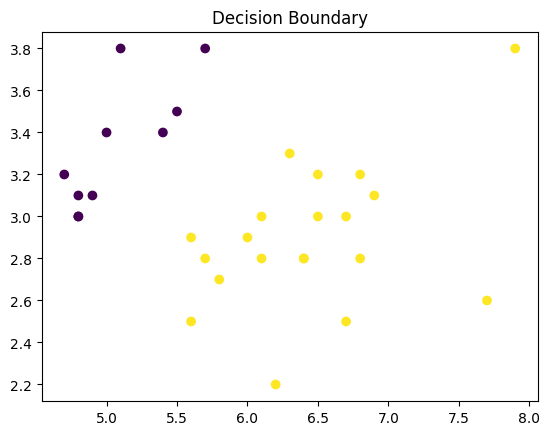

In [19]:

import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load Iris dataset
iris = load_iris()
X = iris.data
y = (iris.target != 0).astype(int)  # Binary classification, 1 for class 1 and 0 for class 0

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Neural network implementation
input_size = 4  # Number of features in Iris dataset
hidden_size = 4
output_size = 1
lr = 0.01
epochs = 1000

# Initialize weights and biases
wh = np.random.randn(input_size, hidden_size)
bh = np.zeros((1, hidden_size))
wo = np.random.randn(hidden_size, output_size)
bo = np.zeros((1, output_size))

# Training loop
for epoch in range(epochs):
    # Forward propagation
    hidden_input = np.dot(X_train, wh) + bh
    hidden_activation = 1 / (1 + np.exp(-hidden_input))
    output_layer = np.dot(hidden_activation, wo) + bo
    output = 1 / (1 + np.exp(-output_layer))

    # Backward propagation
    E = y_train.reshape(-1, 1) - output
    slope_output = output * (1 - output)
    slope_hidden = hidden_activation * (1 - hidden_activation)
    d_output = E * slope_output
    error_hidden = d_output.dot(wo.T)
    d_hidden = error_hidden * slope_hidden

    # Update weights and biases
    wo += hidden_activation.T.dot(d_output) * lr
    bo += np.sum(d_output, axis=0, keepdims=True) * lr
    wh += X_train.T.dot(d_hidden) * lr
    bh += np.sum(d_hidden, axis=0, keepdims=True) * lr

# Testing the trained model
hidden_input_test = np.dot(X_test, wh) + bh
hidden_activation_test = 1 / (1 + np.exp(-hidden_input_test))
output_layer_test = np.dot(hidden_activation_test, wo) + bo
output_test = 1 / (1 + np.exp(-output_layer_test))

# Make predictions (rounding to 0 or 1)
predictions = np.round(output_test).flatten()

# Calculate accuracy
accuracy = np.mean(predictions == y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plot the decision boundary (considering the first two features of the dataset)
plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions, cmap='viridis')
plt.title("Decision Boundary")
plt.show()


In [20]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  